# 네이버 블로그 검색 후 워드 클라우드 그리기

In [2]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

������ ��θ� ã�� �� �����ϴ�.
������ ��θ� ã�� �� �����ϴ�.
������ ��θ� ã�� �� �����ϴ�.


In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
path = plt.rc('font', family='Malgun Gothic')

In [8]:
df = pd.read_csv('data/smartphone_blog.csv')
df.head()

,title,date,content
0,[스마트폰] 삼성 갤럭시Z 플립3 언박싱 후기,2021.08.16.,"진짜 역대급으로 나온 스마트폰, 삼성 갤럭시Z 플립3 언박싱 후기 함께 공개된 삼성..."
1,갤럭시 A03s의 출시소식과 상세 정보: 개발도상국용 초저가 스마트폰,2021.08.24.,삼성이 인도시장 등 개발도상국용 초저가 스마트폰인 A0x 시리즈를 지난 2019년부...
2,삼성 갤럭시노트10 가격 2021년에도 매력적인 스마트폰,2021.06.23.,"일상에서 스마트폰 사용량은 점점 늘어나고 있습니다. 카카오톡, 라인 같은 기본적인 ..."
3,에어팟 프로 안드로이드 스마트폰과 연결하는 방법,2021.08.21.,"그러면 이때 스마트폰 블루투스 메뉴로 가줍니다. 찾기를 눌러주면, 이렇게 검색이 되..."
4,스마트폰마이크 젠하이저 핀마이크 또롱또롱 잘 들리네요~^^,어제,젠하이저 핀마이크 스마트폰마이크로 짱 좋아요!!! 아래 영상으로 확인 해 보세요~ ...


In [9]:
text = ''
for i in df.index:
    text += df.title[i] + '\n' + df.content[i] + '\n'

In [10]:
from konlpy.tag import Okt
okt = Okt()
tokens = okt.nouns(text)
tokens[:10]

['스마트폰', '삼성', '갤럭시', '플립', '언박싱', '후기', '진짜', '역대', '스마트폰', '삼성']

In [11]:
okt.nouns('오늘 갤럭시플립3과 갤럭시Z플립3와 갤럭시폴드3을 샀다')

['오늘', '갤럭시', '플립', '과', '갤럭시', '플립', '갤럭시', '폴드']

Okt의 한계 극복
- 단어 추가
- 영어, 숫자 포함 단어 변환

In [12]:
from ckonlpy.tag import Twitter
twt = Twitter()
twt.add_dictionary('갤럭시Z플립3','Noun')
twt.add_dictionary('갤럭시Z폴드3','Noun')
twt.nouns('오늘 갤럭시플립3과 갤럭시Z플립3와 갤럭시Z폴드3을 샀다')

C:\Users\Hs\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['오늘', '갤럭시', '플립', '과', '갤럭시Z플립3', '갤럭시Z폴드3']

In [13]:
trans_dict = {'갤럭시폴드3':'갤럭시Z폴드3', '갤럭시 폴드3':'갤럭시Z폴드3', 
              '갤럭시z폴드3':'갤럭시Z폴드3', '갤럭시Z 폴드3':'갤럭시Z폴드3',
              '갤럭시플립3':'갤럭시Z플립3', '갤럭시 플립3':'갤럭시Z플립3', 
              '갤럭시z플립3':'갤럭시Z플립3', '갤럭시Z 플립3':'갤럭시Z플립3'}
change_list = list(trans_dict.keys())

In [14]:
sentence = '오늘 갤럭시 플립3과 갤럭시z플립3와 갤럭시z폴드3을 샀다'
def change_word(sentence):
    for cword in change_list:
        sentence = sentence.replace(cword, trans_dict[cword])
    return sentence

change_word(sentence)

'오늘 갤럭시Z플립3과 갤럭시Z플립3와 갤럭시Z폴드3을 샀다'

In [15]:
new_text = change_word(text)

In [16]:
new_tokens = twt.nouns(new_text)

## 불용어 걸러내기

In [17]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

- 아래 두 과정 반복

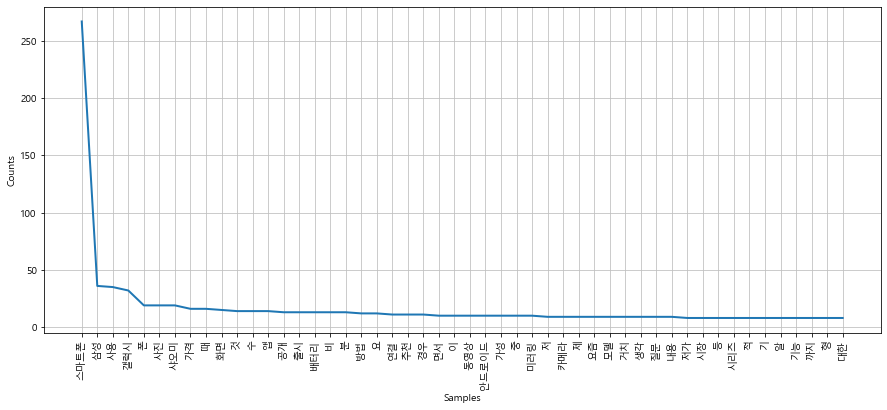

In [18]:
blog = nltk.Text(new_tokens, name='스마트폰')
plt.figure(figsize=(15,6))
blog.plot(50)
plt.show()

In [19]:
stoptext = """
    수 것 연결 가격 공개 때 설정 경우 이 비 질문 위 등 생각 제 품 내용 법 분 추천 기능 요 교육
    용 시장 요즘 저 정도 처음 중 초 동해 오늘 이용 하루 밍 첫 업체 그 한번 이유 대한 블 알 기 형
    어요 가지 적 이나 까지 데 연 필요 지난 도 꼭
"""
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]


['스마트폰', '삼성', '갤럭시Z플립3', '언박싱', '후기', '진짜', '역대', '급', '스마트폰', '삼성']

## 워드 클라우드 그리기

In [20]:
from wordcloud import WordCloud
from PIL import Image

In [33]:
data = blog.vocab().most_common(300)
path = '‪C:\Windows\Fonts\BlackHanSans-Regular.ttf'
mask = np.array(Image.open('data/smartphone.png'))

In [34]:
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [35]:
wc = WordCloud(
    font_path=path, relative_scaling=0.2, margin=10,
    background_color="white", mask=mask,
    min_font_size=1, max_font_size=120
).generate_from_frequencies(dict(data))

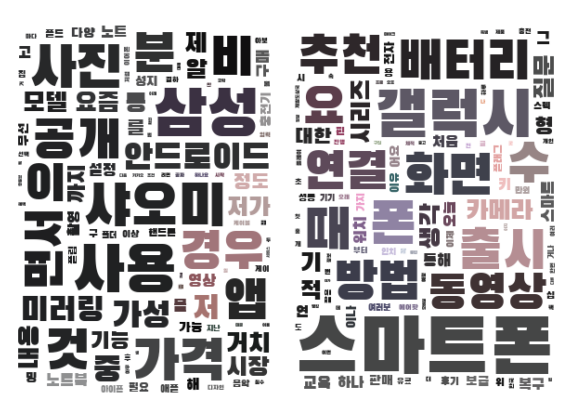

In [36]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors),
            interpolation='bilinear')
plt.axis('off')
plt.show()

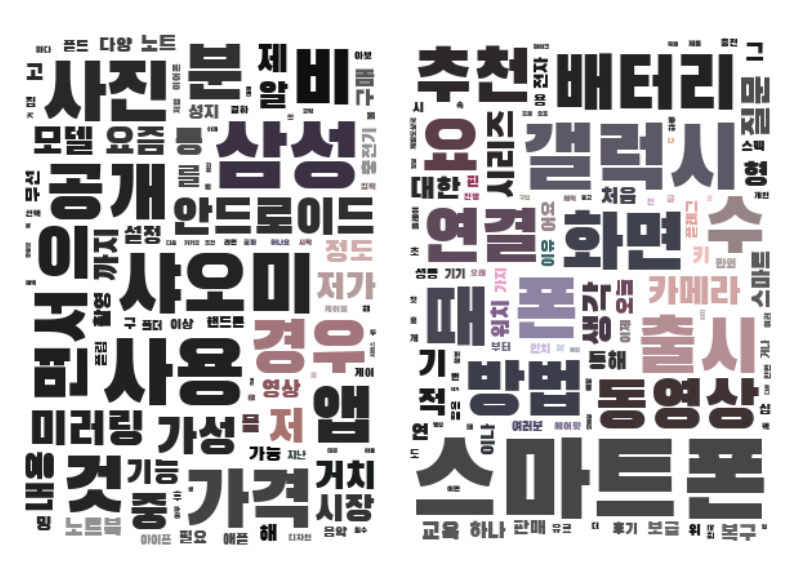

In [38]:
plt.figure(figsize=(10,10), dpi=100)
plt.imshow(wc.recolor(color_func=image_colors),
            interpolation='bilinear')
plt.axis('off')
plt.savefig('data/wordcloud.png')